Based on the wonderful tutorial by Adi Bronshtein
at https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9. <br>
The objective of the tutorial was to demonstrate 2 methods of performing multivariate regression, and as a learner I felt that the results of performing multivariate  regression with statsmodel or sklearn should produce the same results as using scipy stats linregress - I wanted to validate!

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets # Because sklearn comes with datasets for learning - yay!

In [2]:
# Here we loaded a new dataset from sklearn
data = datasets.load_boston()

# And here we put the features into one dataframe, and the targets into another dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [3]:
# There is a handy way to check the data and what it's all about
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# This is what the features data looks like
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
# And this is what the target data looks like
target.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


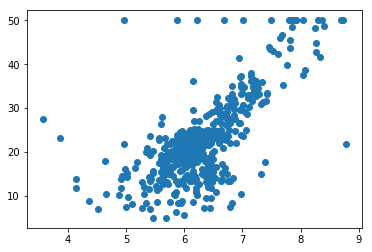

In [6]:
# Let's visualize the relationship between number of rooms and house prices
plt.scatter(df["RM"],target["MEDV"])

## Linear regression with 2 values (scipy.stats)

In [27]:
# We need the stats module from scipy
from scipy import stats

# Using the linregress() function returns 5 values, which we name here for convenience:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

# And here we check the values for slope, intercept, and r_squared
print(slope, intercept, r_value**2)

9.10210898118 -34.6706207764 0.483525455991


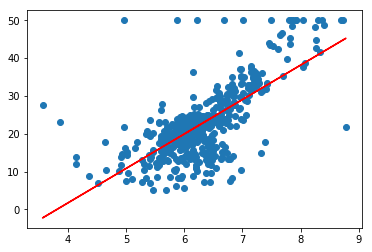

In [10]:
# Let's visualize the results...
# Here we create a little function which takes number of rooms as input to predict corresponding house prices
def get_medv(rm):
    return slope * df["RM"] + intercept

plt.scatter(df["RM"], target["MEDV"])
plt.plot(df["RM"], get_medv(df["RM"]), c='r')
plt.show()

## Multivariate regression but with the same 2 values (statsmodels)
...which is effectively just linear regression!

In [11]:
# Here we import the statsmodels library
import statsmodels.api as sm

# And then set our x and y values
X = df[["RM"]]
y = target["MEDV"]

# If a constant is to be included then you need to say so specifically like this
X = sm.add_constant(X)

# Now let's setup the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# And then print out the handy model summary
model.summary()

# There is a lot of information here! But some key attributes are:
# + R-squared, meaning this model explains only 48.4% of the variance in our dependent variable (not very good!)
# + coef, coefficients for the constant we elected to include and rooms
# + std err the standard error of the sample mean is an estimate of how far 
#   the sample mean is likely to be from the population mean

/Users/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 07 May 2018   Prob (F-statistic):           2.49e-74
Time:                        21:11:07   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Notice how the coefs here correspond to the slope / intercept identified above, as does r-squared!

## Multivariate regression but with the same 2 values (sklearn)
Again, just simple old linear regression

In [13]:
# Here we import linear_model from sklearn
from sklearn import linear_model

# And then set our x and y values
X = df[["RM"]]
y = target["MEDV"]

# Now let's setup the model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [14]:
# Let's check the slope, intercept, and r-squared values here
print(lm.coef_, lm.intercept_, lm.score(X,y))

[ 9.10210898] -34.6706207764 0.483525455991


In [15]:
# An exact match to the other 2 methods - hooray!

## A "proper" example of multivariate regression

In [16]:
# So let's go to the opposite extreme and include ALL the features!

In [17]:
# Here we import the statsmodels library
import statsmodels.api as sm

# And then set our ALL our x and y values
X = df
y = target["MEDV"]

# If a constant is to be included then you need to say so specifically like this
X = sm.add_constant(X)

# Now let's setup the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# And then print out the handy model summary (r-squared is better but not amazing)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 07 May 2018   Prob (F-statistic):          6.95e-135
Time:                        21:11:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Now let's repeat that...
X = df
y = target["MEDV"]

# BUT this time OMIT inclusion of a constant
# X = sm.add_constant(X)

# Now let's setup the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# And then print out summary - notice what a big difference omitting that constant has caused to r-squared!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        21:11:08   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# But we didn't need to include nearly that many features to achieve a similarly high r-squared value...
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

# Now let's setup the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Only a 0.011 difference in r-squared from before...
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        21:11:08   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Now let's do a similar thing with sklearn

In [21]:
# So let's try again with a reduced set of x and y values
X = df[["RM", "LSTAT"]]
y = target["MEDV"]

# Now let's setup the model
lm = linear_model.LinearRegression(fit_intercept = True)
model = lm.fit(X,y)

In [22]:
# We now have 2 co-efficient values
print(list(zip(lm.coef_, df[["RM", "LSTAT"]])))

[(5.0947879843365449, 'RM'), (-0.64235833424412925, 'LSTAT')]


In [23]:
# And the intercept and r-square values as follows
print(lm.intercept_, lm.score(X,y))

-1.35827281187 0.63856160626


In [28]:
# The equivalent using statsmodels is as follows (note WITH constant)
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 07 May 2018   Prob (F-statistic):          7.01e-112
Time:                        21:15:42   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""